In [424]:
import pandas as pd

df = pd.read_csv("trabalhoPratico.csv", sep=';')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
494,29158,Female,55.0,0,0,Yes,Private,Rural,111.19,39.7,formerly smoked,0
495,34299,Female,71.0,0,0,Yes,Private,Urban,93.28,34.7,never smoked,0
496,54375,Male,5.0,0,0,No,children,Rural,122.19,35.0,Unknown,0
497,37832,Female,14.0,0,0,No,children,Rural,129.53,21.3,never smoked,0


**Verificando se há dados ausentes**

In [425]:
# print(df.info())
print(df.isna().sum())

id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  45
smoking_status        0
stroke                0
dtype: int64


**"Imputando" dados ausentes pela moda**

In [426]:
df['bmi'].fillna(df['bmi'].mode()[0], inplace = True)
df.bmi.isnull().sum()

0

**Outliers**

**| Box Plot**

<AxesSubplot: >

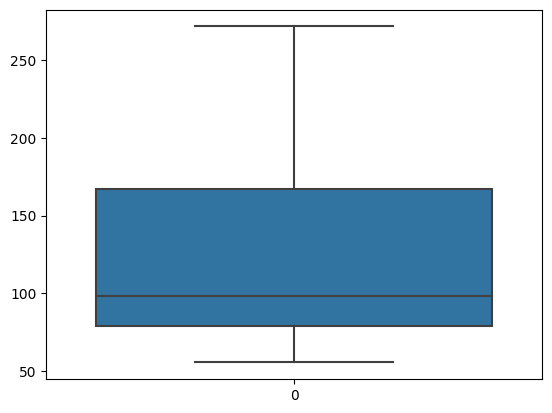

In [427]:
import seaborn as sns

sns.boxplot(df['avg_glucose_level'])

**| Remoção dos outliers**

In [428]:
#função para descobrir os outliers
def outlier(base, avg_glucose_level ):
  Q1 = base[avg_glucose_level ].quantile(0.25)
  Q3 = base[avg_glucose_level ].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = base.index[(base[avg_glucose_level ] < lower_bound) | (base[avg_glucose_level ] > upper_bound)]
  return ls

In [429]:
index_list = []
for avg_glucose_level in ['avg_glucose_level']:
   index_list.extend(outlier(df,avg_glucose_level ))

In [430]:
#verificando quais são os outliers
index_list

[]

In [431]:
#função para remover os outliers
def remove_outlier(dataset, ls):
  ls = sorted(set(ls))
  dataset = dataset.drop(ls)
  return dataset

In [432]:
dataset = remove_outlier(df, index_list)

**Transformação de dados simbólicos para numéricos**

Atributo simbólico que assume apenas dois valores

In [433]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_prev = df.iloc[:,0:12].values # i don't get the target attribute

Visualização antes da transformação

<AxesSubplot: xlabel='ever_married', ylabel='count'>

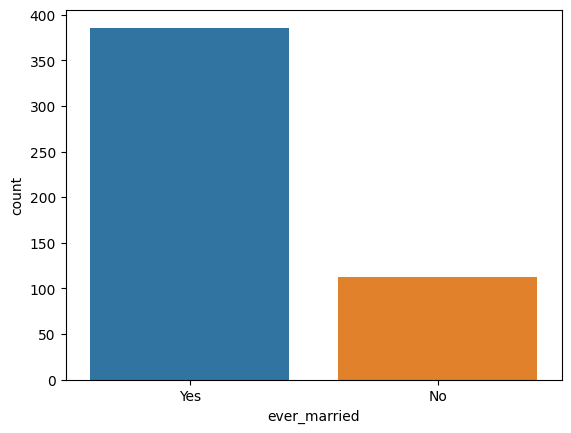

In [434]:
sns.countplot(x = df['ever_married']) 

In [435]:
label_encoder_EverMarried = LabelEncoder()
label_encoder_Gender = LabelEncoder()
label_encoder_ResidenceType = LabelEncoder()

In [436]:
X_prev[:,5] = label_encoder_EverMarried.fit_transform(X_prev[:,5])
X_prev[:,1] = label_encoder_Gender.fit_transform(X_prev[:,1])
X_prev[:,7] = label_encoder_ResidenceType.fit_transform(X_prev[:,7])
X_prev


array([[9046, 1, 67.0, ..., 36.6, 'formerly smoked', 1],
       [51676, 0, 61.0, ..., 27.3, 'never smoked', 1],
       [31112, 1, 80.0, ..., 32.5, 'never smoked', 1],
       ...,
       [54375, 1, 5.0, ..., 35.0, 'Unknown', 0],
       [37832, 0, 14.0, ..., 21.3, 'never smoked', 0],
       [21058, 0, 15.0, ..., 29.1, 'Unknown', 0]], dtype=object)

Visualização após a transformação

<AxesSubplot: xlabel='ever_married', ylabel='count'>

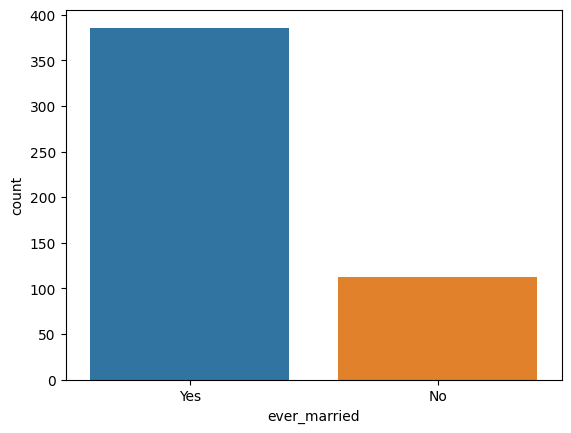

In [437]:
sns.countplot(x = df['ever_married']) 

Transformação (binarização) de atributos nominais

In [438]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [439]:
onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [6, 10])], remainder="passthrough")

In [440]:
X_prev = onehotencoder.fit_transform(X_prev)
X_prev

array([[0.0, 0.0, 1.0, ..., 228.69, 36.6, 1],
       [0.0, 0.0, 0.0, ..., 202.21, 27.3, 1],
       [0.0, 0.0, 1.0, ..., 105.92, 32.5, 1],
       ...,
       [0.0, 0.0, 0.0, ..., 122.19, 35.0, 0],
       [0.0, 0.0, 0.0, ..., 129.53, 21.3, 0],
       [0.0, 0.0, 0.0, ..., 114.53, 29.1, 0]], dtype=object)

**Normalização de dados**

In [441]:
from sklearn.preprocessing import MinMaxScaler

Separando o array em componentes de input (X) e output (Y)

In [442]:
X = X_prev[:, 0:11]
Y = X_prev[:, 11] # target attribute (class)

Gerando a nova escala (normalizando os dados)

In [443]:
scaler = MinMaxScaler(feature_range = (0, 1))
# Após aplicar a fórmula, transformamos os dados em reescalonados
rescaledX = scaler.fit_transform(X)

Sumarizando os dados transformados

In [444]:
print("Dados originais: \n\n", X_prev)
print("\nDados Normalizados: \n\n", rescaledX[0:5, :])

Dados originais: 

 [[0.0 0.0 1.0 ... 228.69 36.6 1]
 [0.0 0.0 0.0 ... 202.21 27.3 1]
 [0.0 0.0 1.0 ... 105.92 32.5 1]
 ...
 [0.0 0.0 0.0 ... 122.19 35.0 0]
 [0.0 0.0 0.0 ... 129.53 21.3 0]
 [0.0 0.0 0.0 ... 114.53 29.1 0]]

Dados Normalizados: 

 [[0.         0.         1.         0.         0.         0.
  1.         0.         0.         0.12250477 1.        ]
 [0.         0.         0.         1.         0.         0.
  0.         1.         0.         0.70817019 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         1.         0.         0.42565498 1.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.82502851 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         1.         0.         0.02110209 0.        ]]
